In [131]:
import pandas as pd #to load and manipulate data and for One-Hot Encoding
import numpy as np #to calculate the mean and standard deviation
import matplotlib.pyplot as plt #to draw graphs 
from sklearn.tree import DecisionTreeClassifier #to build a classification tree 
from sklearn.tree import plot_tree # to draw a classificaton tree 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit # to split data into training and testing sets
from sklearn.model_selection import KFold, cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confution metrix 
from sklearn.metrics import plot_confusion_matrix # to draw a confusion metrix
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from collections import Counter
import collections
from sklearn.preprocessing import StandardScaler
import sklearn

In [132]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")

white_wine = pd.read_csv("winequality-white.csv", sep=";")


In [133]:
red_wine['wine_type'] = 'red'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])
red_wine

white_wine['wine_type'] = 'white'
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium


In [134]:
wines = pd.concat([red_wine, white_wine])
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [135]:
# to rename the column name 
# wines.rename(columns={'quality': 'sex'})
# to change the all columns name 
# wine.columns = ['columns name']

In [136]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

In [137]:
wines['quality_label'].unique()

['low', 'medium', 'high']
Categories (3, object): ['low', 'medium', 'high']

In [138]:
x = wines.drop(columns = ['quality_label' , 'wine_type',  'sulphates', 'pH', 'residual sugar', 'density'], axis=1)
y = wines['quality_label']

In [139]:
y

0          low
1          low
2          low
3       medium
4          low
         ...  
4893    medium
4894       low
4895    medium
4896    medium
4897    medium
Name: quality_label, Length: 6497, dtype: category
Categories (3, object): ['low', 'medium', 'high']

In [140]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [141]:
#create a decision tree and fit it to the training data 
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(x_train, y_train)

[Text(334.8, 339.75, 'quality <= 5.5\ngini = 0.501\nsamples = 5197\nvalue = [158, 1907, 3132]\nclass = high'),
 Text(167.4, 203.84999999999997, 'gini = 0.0\nsamples = 1907\nvalue = [0, 1907, 0]\nclass = medium'),
 Text(502.20000000000005, 203.84999999999997, 'quality <= 7.5\ngini = 0.091\nsamples = 3290\nvalue = [158, 0, 3132]\nclass = high'),
 Text(334.8, 67.94999999999999, 'gini = 0.0\nsamples = 3132\nvalue = [0, 0, 3132]\nclass = high'),
 Text(669.6, 67.94999999999999, 'gini = 0.0\nsamples = 158\nvalue = [158, 0, 0]\nclass = low')]

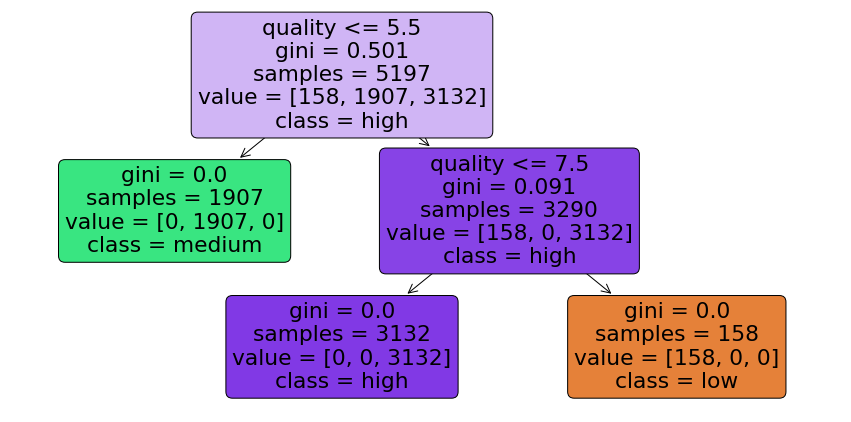

In [158]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=['low', 'medium', 'high'], feature_names= x.columns, max_depth=5)

In [143]:
clf_dt_predictions = clf_dt.predict(x_test)

print(classification_report(y_test,clf_dt_predictions, target_names=['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       1.00      1.00      1.00        40
      medium       1.00      1.00      1.00       477
        high       1.00      1.00      1.00       783

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [144]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)


Counter({'medium': 2706, 'low': 1693, 'high': 148}) Counter({'medium': 1209, 'low': 691, 'high': 50})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [145]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [146]:
# train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.29      0.38      0.33        50
      medium       0.66      0.68      0.67       691
        high       0.80      0.77      0.78      1209

    accuracy                           0.73      1950
   macro avg       0.58      0.61      0.60      1950
weighted avg       0.74      0.73      0.73      1950



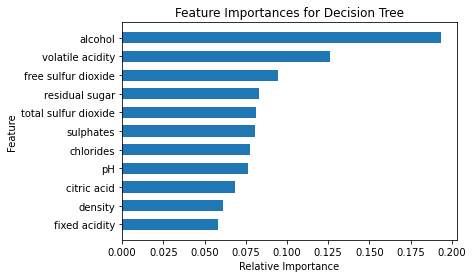

In [147]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')